# Morse Code Translator

## Driving Question:
How can we use sound to communicate language?

## Essential Questions:
* What is Morse Code?
* How do we create an alphabet using sound?
* What is composition? How do we use it?

### What is Morse Code?
Morse Code was developed by Samuel F. B. Morse in 1836. He developed the electromagnetic telegraph. Morse Code can be transmitted using sound or light. When Morse Code is sent as sound signals, a 'dah' represents a long sound and a 'dit' (or 'dot') represents a short sound. These are sometimes shown in print as '-' for 'dah' and '.' for 'dit.'

Extra: History of Morse Code https://www.youtube.com/watch?v=bNoOYeS0gs0

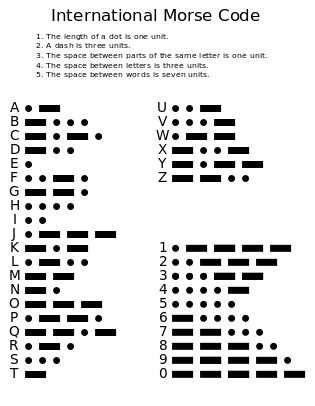

In [1]:
from IPython.display import Image
Image(filename='morse_code.png')

### Opening Activity:
How can we recreate the Morse Code alphabet in the image above using a simple Python collection?

In [2]:
#Solution: using a dictionary
morse_code_alphabet = {
        'A': '.-',              'a': '.-',
        'B': '-...',            'b': '-...',
        'C': '-.-.',            'c': '-.-.',
        'D': '-..',             'd': '-..',
        'E': '.',               'e': '.',
        'F': '..-.',            'f': '..-.',
        'G': '--.',             'g': '--.',
        'H': '....',            'h': '....',
        'I': '..',              'i': '..',
        'J': '.---',            'j': '.---',
        'K': '-.-',             'k': '-.-',
        'L': '.-..',            'l': '.-..',
        'M': '--',              'm': '--',
        'N': '-.',              'n': '-.',
        'O': '---',             'o': '---',
        'P': '.--.',            'p': '.--.',
        'Q': '--.-',            'q': '--.-',
        'R': '.-.',             'r': '.-.',
        'S': '...',             's': '...',
        'T': '-',               't': '-',
        'U': '..-',             'u': '..-',
        'V': '...-',            'v': '...-',
        'W': '.--',             'w': '.--',
        'X': '-..-',            'x': '-..-',
        'Y': '-.--',            'y': '-.--',
        'Z': '--..',            'z': '--..',
        '0': '-----',           ',': '--..--',
        '1': '.----',           '.': '.-.-.-',
        '2': '..---',           '?': '..--..',
        '3': '...--',           ';': '-.-.-.',
        '4': '....-',           ':': '---...',
        '5': '.....',           "'": '.----.',
        '6': '-....',           '-': '-....-',
        '7': '--...',           '/': '-..-.',
        '8': '---..',           '(': '-.--.-',
        '9': '----.',           ')': '-.--.-',
        ' ': ' ',               '_': '..--.-',
}

## Project Setup:
OSX / Linux / Windows
```
pip install pydub
```

### Additional Requirements:

You must use either **libav or ffmpeg**.

Mac (using [homebrew](http://brew.sh)):

```bash
# libav
brew install libav --with-libvorbis --with-sdl --with-theora

####    OR    #####

# ffmpeg
brew install ffmpeg --with-libvorbis --with-ffplay --with-theora
```

Linux (using aptitude):

```bash
# libav
apt-get install libav-tools libavcodec-extra-53

####    OR    #####

# ffmpeg
apt-get install ffmpeg libavcodec-extra-53
```

Windows:

1. Download and extract libav from [Windows binaries provided here](http://builds.libav.org/windows/).
2. Add the libav `/bin` folder to your PATH envvar
3. `pip install pydub`


In [3]:
#Python dependencies:
import thinkdsp
from pydub import AudioSegment
import warnings

warnings.filterwarnings('ignore')

### How do we create an alphabet using sound?
Lets start by figuring out how to represent a letter! In Morse Code, letters are made up of 'dits' and 'dahs' as we saw and heard above. We can build on our concept of a Note that we built upon last session:

In [4]:
class Note:
    def __init__(self, freq, dur, name):
        self.freq = freq
        self.duration = dur
        self.name = name
        self.createWave()
        
    def createWave(self):
        cos = thinkdsp.CosSignal(freq=self.freq, amp=1.0, offset=0)
        wave = cos.make_wave(duration=self.duration, start=0, framerate=11025)
        self.wave = wave
        wave.write(self.name+'.wav')
        
    def getAudioSegment(self):
        return AudioSegment.from_wav(self.name+'.wav')

Let's try to create a 'dit' as a note. We will set the frequency to 700mhz, and the duration to about 1/20th of a second.

In [5]:
dot_duration = 0.058 #seconds - 0.058 is 5.8 milliseconds
note_frequency = 700
dot = Note(note_frequency, dot_duration, 'dot')
dot.wave.make_audio()

Writing dot.wav


Now you try to create a 'dah.' We will again set it to 700mhz, but set the duration to 3 times the length of a 'dit.'

In [6]:
#Create 'dah':


In [7]:
#Solution:
dah = Note(note_frequency, dot_duration * 3, 'dah')
dah.wave.make_audio()

Writing dah.wav


Let's create three more - an empty space of sound to separate the dits and dahs, letters, and words.

In [8]:
dot_space = Note(0, dot_duration, 'dot_space')
dot_space.wave.make_audio()

Writing dot_space.wav


Great! This will let us create a letter by sandwiching dits and dahs with our 'dot_space's - noiseless segments that act as separators. Now, we need a way to separate letters from each other. Let's create a variable called 'letter_space' that creates another noiseless Note with 3 TIMES THE DIT'S DURATION:

In [9]:
letter_space = Note(0, dot_duration * 3, 'letter_space')
letter_space.wave.make_audio()

Writing letter_space.wav


One more - we still need a way to separate whole words. Create 'word_space' and make it 7 TIMES THE DIT'S DURATION:

In [10]:
word_space = Note(0, dot_duration * 7, 'word_space')
word_space.wave.make_audio()

Writing word_space.wav


### Creating a Letter:
Let's use our previous' session's use of pydub & AudioSegment to create a whole letter now - the letter S (...). First we initialize an "empty" AudioSegment container: 

In [11]:
letter_s = AudioSegment.empty()

Now, we need to append all the necessary bits. We've included a method inside the Note class for converting it to an AudioSegment (ex: ```dot.getAudioSegment()```). You can append dits, dahs, and spaces together with the + symbol. Remember we need 3 dits and 2 spaces in between. 

In [12]:
#Solution
letter_s = dot.getAudioSegment() + dot_space.getAudioSegment() + dot.getAudioSegment() + dot_space.getAudioSegment() + dot.getAudioSegment()

In [13]:
letter_s.export("test2.wav", format="wav")
test2 = thinkdsp.read_wave('test2.wav')
test2.make_audio()

### What is composition?
Composition refers to combining simple types to make more complex ones. Lets take our final example, a translator to turn strings into audio.

In [14]:
class MorseCodeTranslator:
    DOT_DURATION = 0.058 #seconds - 0.058 is 5.8 milliseconds
    NOTE_FREQUENCY = 700
    DOT = Note(NOTE_FREQUENCY, DOT_DURATION, 'dot')
    DAH = Note(NOTE_FREQUENCY, DOT_DURATION*3, 'dah')
    DOT_SPACE = Note(0, DOT_DURATION, 'dot_space')
    LETTER_SPACE = Note(0, DOT_DURATION*3, 'letter_space')
    WORD_SPACE = Note(0, DOT_DURATION*7, 'word_space')
    SOUND_MAPPING = {
        '.': DOT,
        '-': DAH,
        ' ': WORD_SPACE
    }
    def __init__(self, alphabet):
        self.alphabet = alphabet
    def getAudioSegmentFromCode(self, code):
        letter = AudioSegment.empty()
        for index, value in enumerate(code):
            letter += self.SOUND_MAPPING[value].getAudioSegment() + self.DOT_SPACE.getAudioSegment()
        letter += self.LETTER_SPACE.getAudioSegment()   
        return letter
    def getBufferSegment(self):
        return self.WORD_SPACE.getAudioSegment() + self.getAudioSegmentFromCode('.')
    def translatetoAudio(self, phrase):
        audioOutput = AudioSegment.empty()
        for index, value in enumerate(phrase):
            character = self.alphabet[value]
            audioSegmentToAppend = self.getAudioSegmentFromCode(character)
            audioOutput += audioSegmentToAppend
        audioOutput += self.getBufferSegment()   
        audioOutput.export("translation.wav", format="wav")
        return thinkdsp.read_wave('translation.wav')
    
t = MorseCodeTranslator(morse_code_alphabet)

Writing dot.wav
Writing dah.wav
Writing dot_space.wav
Writing letter_space.wav
Writing word_space.wav


### Reinforcing Activity:
How can we translate the phrase "Hello World" to Morse Code audio?

In [15]:
#Solution:
solution = t.translatetoAudio('Hello World')
solution.make_audio()

### Followup Questions:
* What does this class do?
* Why do we use 'getBufferSegment' ? What happens if we take it out?
* How does this class use composition?
* What objects are owned by the instance of translator and what are shared by all translator objects?

## Decoder:
We can use the following site to decode and analyze our waveforms from the web browser. 

If you are on Chrome, use:
https://morsecode.scphillips.com/labs/decoder/

Everything else:
http://morsecode.scphillips.com/labs/decoder/



## Extending Activity
How can we use "abbreviations" to minimize the amount of data we must send? Why is this useful?

Example: Q Codes:

* QSL	    I acknowledge receipt
* QSL?	Do you acknowledge?
* QRX	    Wait
* QRX?	Should I wait?
* QRV	    I am ready to copy
* QRV?	Are you ready to copy?
* QRL	    The frequency is in use
* QRL?	Is the frequency in use?
* QTH	    My location is...
* QTH?	What is your location?